In [70]:
import numpy as np
import pandas as pd

In [71]:
N=1000
X0 = np.random.randn(N)

<AxesSubplot:>

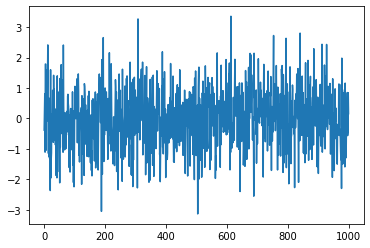

In [72]:
pd.Series(X0).plot()

<AxesSubplot:>

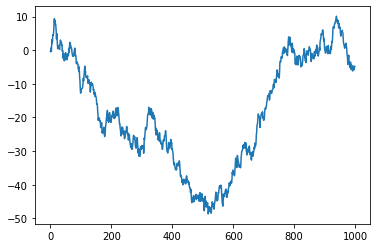

In [73]:
X1 = np.cumsum(X0)
pd.Series(X1).plot()

<AxesSubplot:>

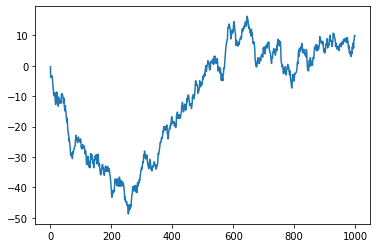

In [74]:
Y0 = np.random.randn(N)
Y1 = np.cumsum(Y0)
pd.Series(Y1).plot()

<AxesSubplot:>

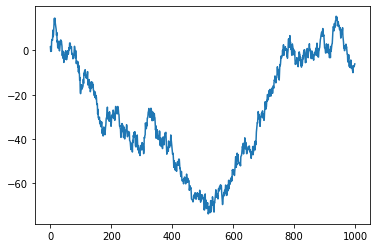

In [75]:
Z1 = 1.5*X1 + np.random.randn(N)
pd.Series(Z1).plot()

In [76]:
from statsmodels.tsa.stattools import adfuller
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [77]:
adf(X0)

Test-Statistic: -31.62778420802604
P-Value: 0.0
Stationary


In [78]:
adf(X1)

Test-Statistic: -1.0821016274252266
P-Value: 0.7221565385167942
Non-Stationary


In [79]:
adf(Y0)

Test-Statistic: -30.854479935324502
P-Value: 0.0
Stationary


In [80]:
adf(Y1)

Test-Statistic: -0.6390276975457617
P-Value: 0.8619173073037886
Non-Stationary


In [81]:
adf(Z1)

Test-Statistic: -1.3553051896730077
P-Value: 0.6035060816401748
Non-Stationary


In [82]:
import statsmodels.api as sm
X = sm.add_constant(X1)
model = sm.OLS(Y1,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     16.04
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           6.68e-05
Time:                        17:41:27   Log-Likelihood:                -4281.1
No. Observations:                1000   AIC:                             8566.
Df Residuals:                     998   BIC:                             8576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1249      0.830     -9.790      0.000      -9.754      -6.496
x1             0.1359      0.034      4.004      0.000       0.069       0.202
==============================================================================
Omnibus:                     1000.420   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.521
Skew:                          -0.396   Prob(JB):                     3.64e-20
Kurtosis:                       1.767   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
residuals = Y1 - (results.params[0]+results.params[1]*X1)

<AxesSubplot:>

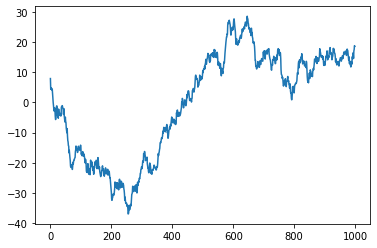

In [84]:
pd.Series(residuals).plot()

In [85]:
adf(residuals)

Test-Statistic: -0.6812724400623947
P-Value: 0.8515409482823828
Non-Stationary


In [86]:
import statsmodels.api as sm
X = sm.add_constant(X1)
model = sm.OLS(Z1,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.201e+05
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:41:30   Log-Likelihood:                -1403.1
No. Observations:                1000   AIC:                             2810.
Df Residuals:                     998   BIC:                             2820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0877      0.047      1.879      0.060      -0.004       0.179
x1             1.5027      0.002    787.454      0.000       1.499       1.506
==============================================================================
Omnibus:                        1.515   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.589
Skew:                          -0.077   Prob(JB):                        0.452
Kurtosis:                       2.880   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
residuals = Z1 - (results.params[0]+results.params[1]*X1)

<AxesSubplot:>

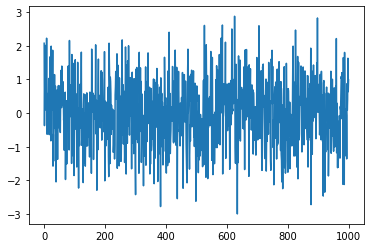

In [88]:
pd.Series(residuals).plot()

In [89]:
adf(residuals)

Test-Statistic: -31.10124014234965
P-Value: 0.0
Stationary
